In [1]:
! pip install census

In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
from census import Census
from scipy.stats import linregress
from sklearn import datasets


# Census & gmaps API Keys
# from config import (api_key)
# c = Census(api_key)
# print (c)

# api_key

In [3]:
csv_path = "income_file.csv"

census_pd = pd.read_csv(csv_path, encoding="ISO-8859-1")
#census_pd.dropna


In [4]:
census_pd

,ï»¿OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,FIPS_CODE,B11001_001E,DP03_0052E,DP03_0053E,DP03_0054E,DP03_0055E,DP03_0056E,DP03_0057E,DP03_0058E,HOUSELT75KP_CALC,INCLT75E_CALC,Deaths as of October 19 2020,Percent_Poverty
0,1,0500000US01001,Autauga County,Alabama,1001,21115,1496.0,1221.0,2142.0,1671.0,2507.0,3819.0,2967.0,60.89,12856.0,28,30.93
1,2,0500000US01003,Baldwin County,Alabama,1003,78622,4227.0,4078.0,7216.0,8626.0,10589.0,15144.0,9691.0,63.44,49880.0,67,30.71
2,3,0500000US01005,Barbour County,Alabama,1005,9186,1225.0,822.0,1517.0,1112.0,1301.0,1317.0,806.0,79.40,7294.0,9,50.90
3,4,0500000US01007,Bibb County,Alabama,1007,6840,437.0,559.0,883.0,762.0,1028.0,1141.0,1000.0,70.32,4810.0,13,38.61
4,5,0500000US01009,Blount County,Alabama,1009,20600,1723.0,1162.0,2346.0,2587.0,2707.0,4297.0,2461.0,71.95,14822.0,23,37.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,3136,0500000US56037,Sweetwater County,Wyoming,56037,15871,776.0,601.0,1302.0,970.0,1700.0,2820.0,2600.0,51.47,8169.0,2,22.99
3136,3137,0500000US56039,Teton County,Wyoming,56039,9158,198.0,209.0,573.0,434.0,859.0,1613.0,1383.0,42.43,3886.0,1,15.44
3137,3138,0500000US56041,Uinta County,Wyoming,56041,7735,433.0,343.0,733.0,658.0,1127.0,1466.0,1073.0,61.54,4760.0,2,28.02
3138,3139,0500000US56043,Washakie County,Wyoming,56043,3422,125.0,174.0,288.0,401.0,587.0,772.0,541.0,68.59,2347.0,7,28.87


In [5]:
# census_data = requests.get(https://covid19.census.gov/datasets/income-and-benefits-counties/data?geometry=138.304%2C-16.868%2C-137.673%2C72.108)
                           
#"GEO_NAME", "GEO_PARENT_NAME", "FIPS_CODE", "B11001_001E", "DP03_0052", "DP03_0053E", "DP03_0054E", "DP03_0055E", "DP03_0056E", "DP03_0057E", "DP03_0058E", "HOUSELT75KP_CALC", "INCLT75E_CALC")

# Convert to DataFrame
# census_pd = pd.read_csv(csv_path, encoding="ISO-8859-1")

# Column Reordering
census_pd = census_pd.rename(columns={"GEO_NAME": "County",
                                      "GEO_PARENT_NAME": "State",
                                      "FIPS_CODE": "CountyFP",
                                      "B11001_001E": "Total Households",
                                      "DP03_0052E": "Total Income < $10,000",
                                      "DP03_0053E": "Total Income $10,000-$14,999",
                                      "DP03_0054E": "Total Income $15,000-$24,999",
                                      "DP03_0055E": "Total Income $25,000-$34,999",
                                      "DP03_0056E": "Total Income $35,000-$49,999",
                                      "DP03_0057E": "Total Income $50,000-$74,999",
                                      "DP03_0058E": "Total Income $75,000-$99,999",
                                      "HOUSELT75KP_CALC": "Percent of Households < $75,000",
                                      "INCLT75E_CALC": "Total Households < $75,000",
                                      "Deaths as of October 19 2020": "Deaths per County",
                                      "Percent_Poverty": "Percent of Poverty"})

# Final DataFrame
census_pd = census_pd[["County", "State", "CountyFP", "Total Households", "Total Income < $10,000", "Total Income $10,000-$14,999", "Total Income $15,000-$24,999", "Total Income $25,000-$34,999",
                       "Total Income $35,000-$49,999", "Total Income $50,000-$74,999", "Total Income $75,000-$99,999", "Percent of Poverty", "Percent of Households < $75,000", "Total Households < $75,000", "Deaths per County"]]

# Visualize
print(len(census_pd))
census_pd.head()


3140


,County,State,CountyFP,Total Households,"Total Income < $10,000","Total Income $10,000-$14,999","Total Income $15,000-$24,999","Total Income $25,000-$34,999","Total Income $35,000-$49,999","Total Income $50,000-$74,999","Total Income $75,000-$99,999",Percent of Poverty,"Percent of Households < $75,000","Total Households < $75,000",Deaths per County
0,Autauga County,Alabama,1001,21115,1496.0,1221.0,2142.0,1671.0,2507.0,3819.0,2967.0,30.93,60.89,12856.0,28
1,Baldwin County,Alabama,1003,78622,4227.0,4078.0,7216.0,8626.0,10589.0,15144.0,9691.0,30.71,63.44,49880.0,67
2,Barbour County,Alabama,1005,9186,1225.0,822.0,1517.0,1112.0,1301.0,1317.0,806.0,50.90,79.40,7294.0,9
3,Bibb County,Alabama,1007,6840,437.0,559.0,883.0,762.0,1028.0,1141.0,1000.0,38.61,70.32,4810.0,13
4,Blount County,Alabama,1009,20600,1723.0,1162.0,2346.0,2587.0,2707.0,4297.0,2461.0,37.95,71.95,14822.0,23


In [6]:
poverty_death=census_pd[["County", "State", "CountyFP", "Total Households", "Percent of Poverty", "Deaths per County"]]
poverty_death

,County,State,CountyFP,Total Households,Percent of Poverty,Deaths per County
0,Autauga County,Alabama,1001,21115,30.93,28
1,Baldwin County,Alabama,1003,78622,30.71,67
2,Barbour County,Alabama,1005,9186,50.90,9
3,Bibb County,Alabama,1007,6840,38.61,13
4,Blount County,Alabama,1009,20600,37.95,23
...,...,...,...,...,...,...
3135,Sweetwater County,Wyoming,56037,15871,22.99,2
3136,Teton County,Wyoming,56039,9158,15.44,1
3137,Uinta County,Wyoming,56041,7735,28.02,2
3138,Washakie County,Wyoming,56043,3422,28.87,7


In [7]:
def linear_regression_plot(x_values, y_values, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     line_eq = "y = " + int(round(slope,2)) + "x + " + int(round(intercept,2))
#     x_values = census_pd['Deaths per County']
#     y_values = census_pd['Percent of Poverty']
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Deaths per county")
    plt.ylabel("Percent of Poverty")
    print(f"The r value is:{round(rvalue,2)}")
    plt.show()

The r value is:-0.08


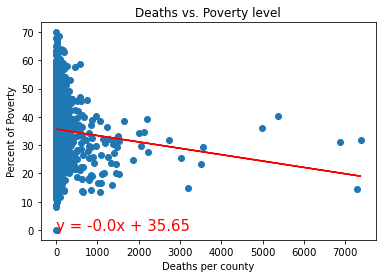

In [8]:
linear_regression_plot(census_pd["Deaths per County"],census_pd["Percent of Poverty"], "Deaths vs. Poverty level",(0,0))


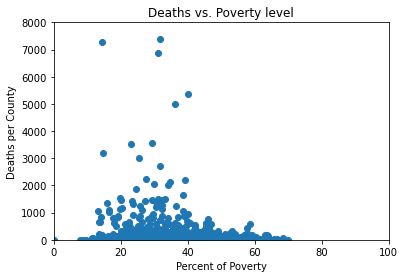

In [9]:
x_val= poverty_death["Percent of Poverty"]
y_val= poverty_death["Deaths per County"]

#slope, intercept, r, p, stderr = linregress(x_val, y_val)
#regress_values = x_val * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
#plt.plot(x_val,regress_values,"r-")
#plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Deaths vs. Poverty level")
plt.xlabel("Percent of Poverty")
plt.ylabel("Deaths per County")
plt.xlim(0, 100)
plt.ylim(0, 8000)
plt.show()

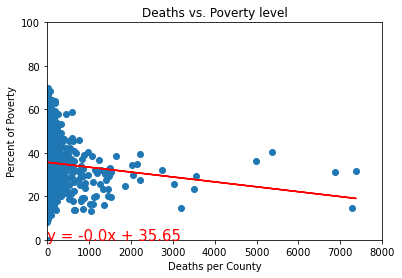

In [10]:
x_val= poverty_death["Deaths per County"]
y_val= poverty_death["Percent of Poverty"]

slope, intercept, r, p, stderr = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Deaths vs. Poverty level")
plt.xlabel("Deaths per County")
plt.ylabel("Percent of Poverty")
plt.xlim(0, 8000)
plt.ylim(0, 100)
plt.show()